In [1]:
import numpy as np

In [5]:
def cov1d(x,w,p = 0,s=1):#1차원 합성곱
    w_rot = np.array(w[::-1])#필터 뒤집기
    x_padded = np.array(x)
    
    if p>0:
        zero_pad = np.zeros(shape=p)#제로 패딩
        x_padded = np.concatenate([zero_pad,
                                    x_padded,
                                    zero_pad])#입력에 패딩 씌움(앞 뒤로 패딩 추가)
        res = []
        for i in range(0,int(len(x)/s),s):#스트라이드 만큼 옮김
            res.append(np.sum(x_padded[i:i+w_rot.shape[0]]*
                             w_rot))#곱 계산
        return np.array(res)#배열로 반환

In [6]:
## 테스트
x = [1,3,2,4,5,6,1,3]
w= [1,0,3,1,2]

In [7]:
print('Cov1d 구현:',
     cov1d(x,w,p=2,s=1))

Cov1d 구현: [ 5. 14. 16. 26. 24. 34. 19. 22.]


In [8]:
print('넘파이 결과:',
     np.convolve(x,w,mode='same'))

넘파이 결과: [ 5 14 16 26 24 34 19 22]


In [9]:
import scipy.signal

In [17]:
def cov2d(X,W,p=(0,0),s=(1,1)):#2D 합성곱 계산
    W_rot = np.array(W)[::-1,::-1]
    X_orig = np.array(X)
    n1 = X_orig.shape[0]+2*p[0]#(원본+패딩) 세로 길이
    n2 = X_orig.shape[1]+2*p[1]#(원본+패딩) 가로 길이
    X_padded = np.zeros(shape=(n1,n2))#제로 패딩 생성
    X_padded[p[0]:p[0]+X_orig.shape[0],
            p[1]:p[1]+X_orig.shape[1]]=X_orig#입력에 패딩 씌움
    res=[]
    for i in range(0,int((X_padded.shape[0]-
                         W_rot.shape[0])/s[0])+1,s[0]):#스트라이드만큼 세로로 움직임
        res.append([])#row 곱
        for j in range(0,int((X_padded.shape[1]-W_rot.shape[1])/s[1])+1,s[1]):#스트라이드 만큼 가로로 움직임
            X_sub = X_padded[i:i+W_rot.shape[0],j:j+W_rot.shape[1]]
            res[-1].append(np.sum(X_sub*W_rot))#합성곱 계싼(마지막 row에 현재 곱 append)
    return(np.array(res))

In [18]:
X = [[1,3,2,4],[5,6,1,3],[1,2,0,2],[3,4,3,2]]
W = [[1,0,3],[1,2,1],[0,1,1]]

In [19]:
print('Cov2d 구현:\n',
     cov2d(X,W,p=(1,1),s=(1,1)))

Cov2d 구현:
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]


In [20]:
print('사이파이 결과:\n',
     scipy.signal.convolve2d(X,W,mode='same'))

사이파이 결과:
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


In [22]:
#파이썬에서 이미지 읽기
!pip install imageio

In [28]:
#파이썬에서 이미지 읽기
import imageio
img = imageio.imread('./example-image.png',pilmode='RGB')

In [29]:
print('이미지 크기:',img.shape)

이미지 크기: (252, 221, 3)


In [31]:
print('채널 수:',img.shape[2])

채널 수: 3


In [33]:
print('이미지 데이터 타입:',img.dtype)

이미지 데이터 타입: uint8


In [35]:
print(img[100:102, 100:102, :])

[[[179 134 110]
  [182 136 112]]

 [[180 135 111]
  [182 137 113]]]


In [36]:
#가져옴
import struct
 
def load_mnist(path, kind='train'):
    """`path`에서 MNIST 데이터 적재하기"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
 
    return images, labels


In [37]:
#mnist 폴더 없어서
from keras.datasets import mnist

In [47]:
(train_X, train_y), (X_test, y_test) = mnist.load_data()

In [48]:
print(train_X.shape)

(60000, 28, 28)


In [49]:
print(X_test.shape)

(10000, 28, 28)


In [50]:
train_X = train_X.reshape([60000,28*28])
X_test = X_test.reshape([10000,28*28])

In [51]:
print(train_X.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [52]:
print(train_y.shape)
print(y_test.shape)

(60000,)
(10000,)


In [55]:
X_train, y_train = train_X[:50000,:],train_y[:50000]
X_valid, y_valid = train_X[50000:,:], train_y[50000:]

In [56]:
print('훈련 세트:',X_train.shape, y_train.shape)

훈련 세트: (50000, 784) (50000,)


In [57]:
print('검증 세트:',X_valid.shape, y_valid.shape)

검증 세트: (10000, 784) (10000,)


In [58]:
print('테스트 세트:',X_test.shape,y_test.shape)

테스트 세트: (10000, 784) (10000,)


In [59]:
mean_vals = np.mean(X_train, axis = 0)

In [60]:
std_val = np.std(X_train)

In [61]:
X_train_centered = (X_train - mean_vals)/std_val
X_valid_centered = (X_valid - mean_vals)/std_val
X_test_centered = (X_test - mean_vals)/std_val

In [62]:
X_train_centered = X_train_centered.reshape((-1,28,28,1))
X_valid_centered = X_valid_centered.reshape((-1,28,28,1))
X_test_centered = X_test_centered.reshape((-1,28,28,1))

In [63]:
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_valid_onehot = to_categorical(y_valid)
y_test_onehot = to_categorical(y_test)

In [64]:
print(y_train[0],y_train_onehot[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [65]:
print('훈련 세트:',X_train_centered.shape, y_train_onehot.shape)
print('검증 세트:',X_valid_centered.shape, y_valid_onehot.shape)
print('테스트 세트:',X_test_centered.shape, y_test_onehot.shape)

훈련 세트: (50000, 28, 28, 1) (50000, 10)
검증 세트: (10000, 28, 28, 1) (10000, 10)
테스트 세트: (10000, 28, 28, 1) (10000, 10)


In [99]:
from tensorflow.keras import layers, models

In [100]:
model = models.Sequential()

In [101]:
model.add(layers.Conv2D(32,(5,5),padding = 'valid',
                      activation = 'relu', input_shape = (28,28,1)))

In [102]:
model.add(layers.MaxPool2D(2,2))

In [103]:
model.add(layers.Conv2D(64,(5,5),padding = 'valid',
                       activation = 'relu'))

In [104]:
model.add(layers.MaxPool2D(2,2))

In [105]:
model.add(layers.Flatten())

In [106]:
model.add(layers.Dense(1024, activation = 'relu'))

In [107]:
model.add(layers.Dropout(0.5))

In [108]:
model.add(layers.Dense(10,activation = 'softmax'))

In [109]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)             

In [110]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam', metrics = ['acc'])

In [120]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

In [140]:
callback_list = [ModelCheckpoint(filepath = 'cnn_checkpoint.h5',
                                monitor = 'val_loss',
                                save_best_only=True),
                TensorBoard(log_dir = 'logs/{}'.format(str(time.asctime())[:5]))]

In [141]:
history = model.fit(X_train_centered, y_train_onehot,
                   batch_size=64, epochs=20,
                   validation_data=(X_valid_centered,y_valid_onehot),
                   callbacks=callback_list)

Epoch 1/20
782/782 [==============================] - 40s 49ms/step - loss: 0.1391 - acc: 0.9573 - val_loss: 0.0546 - val_acc: 0.9842
Epoch 2/20
782/782 [==============================] - 38s 49ms/step - loss: 0.0495 - acc: 0.9849 - val_loss: 0.0446 - val_acc: 0.9865
Epoch 3/20
782/782 [==============================] - 38s 48ms/step - loss: 0.0355 - acc: 0.9889 - val_loss: 0.0363 - val_acc: 0.9897
Epoch 4/20
782/782 [==============================] - 38s 48ms/step - loss: 0.0292 - acc: 0.9911 - val_loss: 0.0455 - val_acc: 0.9886
Epoch 5/20
782/782 [==============================] - 38s 48ms/step - loss: 0.0235 - acc: 0.9927 - val_loss: 0.0454 - val_acc: 0.9880
Epoch 6/20
782/782 [==============================] - 40s 52ms/step - loss: 0.0202 - acc: 0.9936 - val_loss: 0.0414 - val_acc: 0.9908
Epoch 7/20
782/782 [==============================] - 49s 63ms/step - loss: 0.0168 - acc: 0.9946 - val_loss: 0.0385 - val_acc: 0.9910
Epoch 8/20
782/782 [==============================] - 54s 70ms

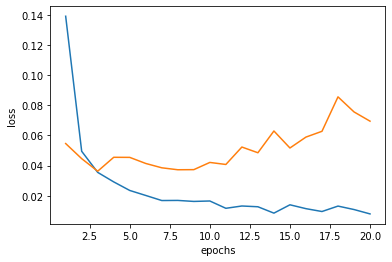

In [142]:
import matplotlib.pyplot as plt

epochs = np.arange(1,21)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

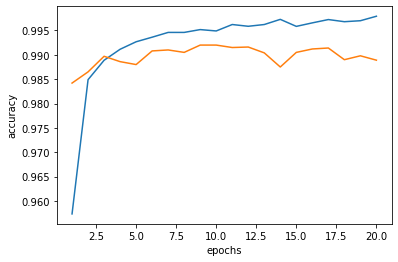

In [143]:
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [144]:
model.save('cnn_model.h5')

In [145]:
from tensorflow.keras.models import load_model

restored_model = load_model('cnn_model.h5')
restored_modell.load_weights('cnn_checkpoint.h5')

In [146]:
restored_model.evaluate(X_test_centered, y_test_onehot)

313/313 [==============================] - 3s 8ms/step - loss: 0.0326 - acc: 0.9892


[0.032633304595947266, 0.9891999959945679]

In [147]:
np.argmax(restored_model.predict(X_test_centered[:10]),axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [148]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

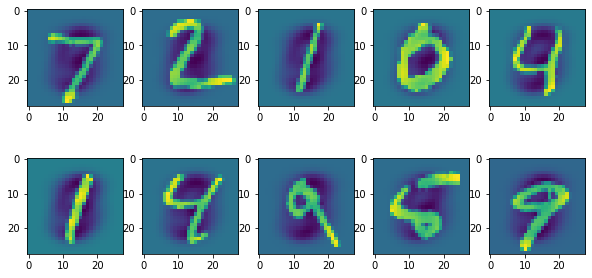

In [149]:
fig = plt.figure(figsize=(10,5))
for i in range(10):
    fig.add_subplot(2,5,i+1)
    plt.imshow(X_test_centered[i].reshape(28,28))

In [150]:
#활성화 출력과 필터 시각화

first_layer = model.layers[0]
print(first_layer)

In [151]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_6_input'), name='conv2d_6_input', description="created by layer 'conv2d_6_input'")


In [152]:
first_activation = models.Model(inputs = model.input,
                               outputs = first_layer.output)

activation = first_activation.predict(X_test_centered[:10])

In [153]:
print(activation.shape)

(10, 24, 24, 32)


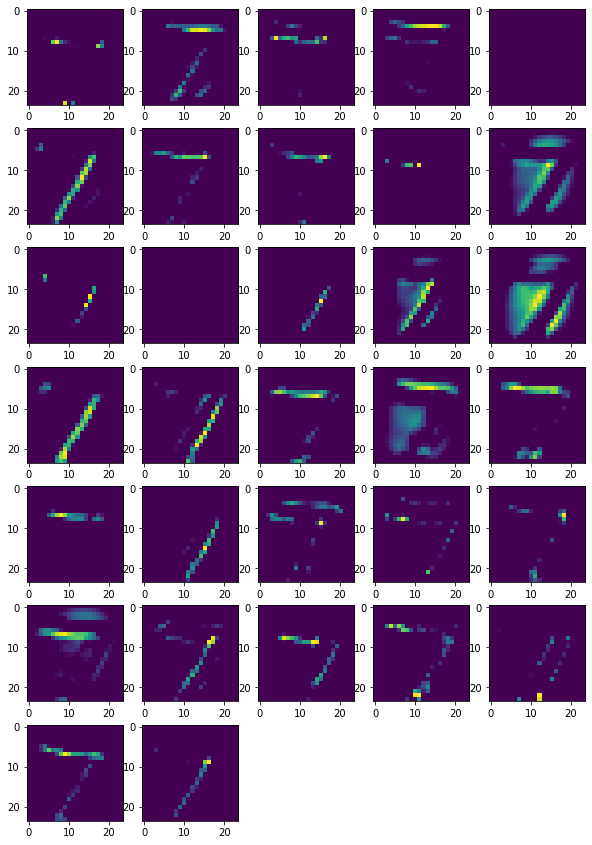

In [155]:
fig = plt.figure(figsize = (10,15))
for i in range(32):
    fig.add_subplot(7,5,i+1)
    plt.imshow(activation[0,:,:,i])

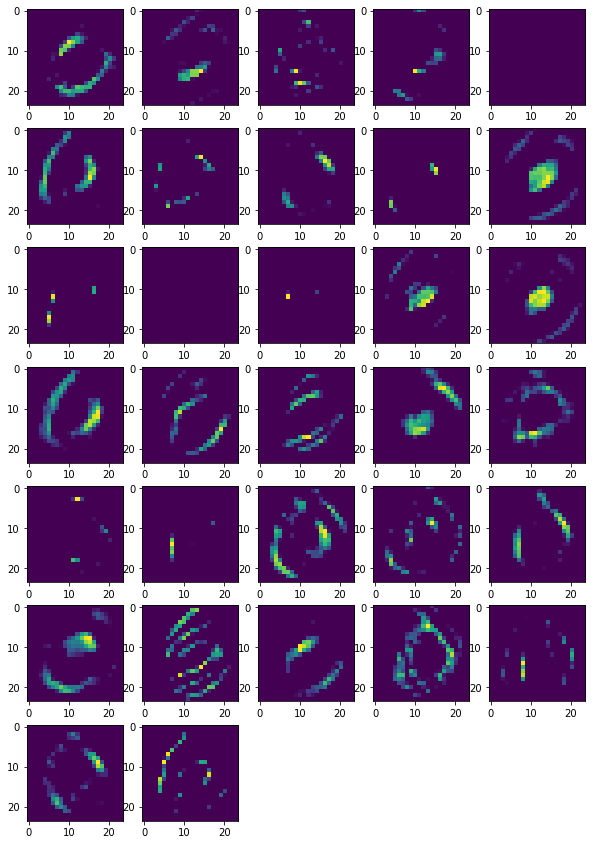

In [156]:
fig = plt.figure(figsize=(10,15))
for i in range(32):
    fig.add_subplot(7,5,i+1)
    plt.imshow(activation[3,:,:,i])

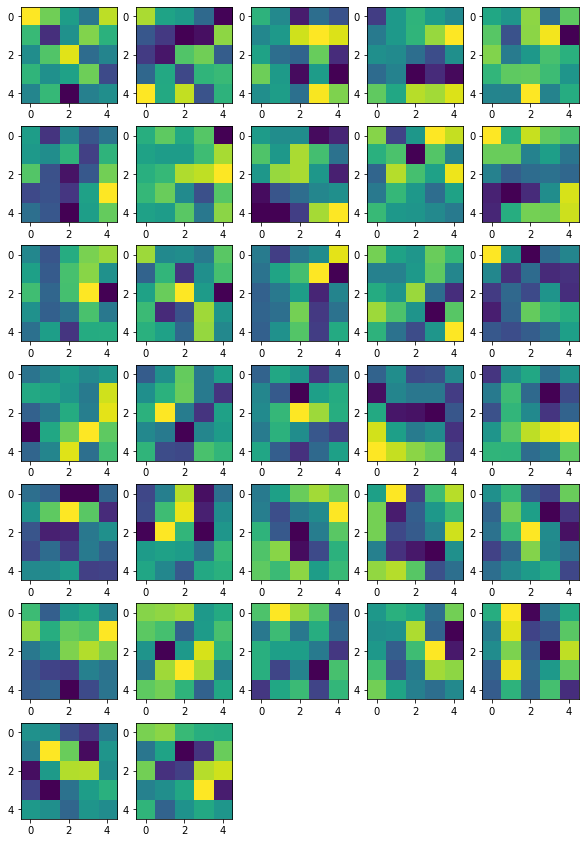

In [157]:
fig = plt.figure(figsize=(10,15))

for i in range(32):
    fig.add_subplot(7,5,i+1)
    plt.imshow(first_layer.kernel[:,:,0,i])